#Market Basket Analysis in Python using Apriori Algorithm

###DataSet : [link text](https://www.kaggle.com/datasets/heeraldedhia/groceries-dataset)

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Data Preparation and understanding


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Groceries_dataset.csv')

In [3]:
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
data.shape

(38765, 3)

In [5]:
data.info

<bound method DataFrame.info of        Member_number        Date        itemDescription
0               1808  21-07-2015         tropical fruit
1               2552  05-01-2015             whole milk
2               2300  19-09-2015              pip fruit
3               1187  12-12-2015       other vegetables
4               3037  01-02-2015             whole milk
...              ...         ...                    ...
38760           4471  08-10-2014          sliced cheese
38761           2022  23-02-2014                  candy
38762           1097  16-04-2014               cake bar
38763           1510  03-12-2014  fruit/vegetable juice
38764           1521  26-12-2014               cat food

[38765 rows x 3 columns]>

In [6]:
data.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [7]:
data.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [8]:
data.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [9]:
data.duplicated().sum()

759

In [10]:
data.drop_duplicates(keep=False, inplace=True)

In [11]:
data.shape

(37274, 3)

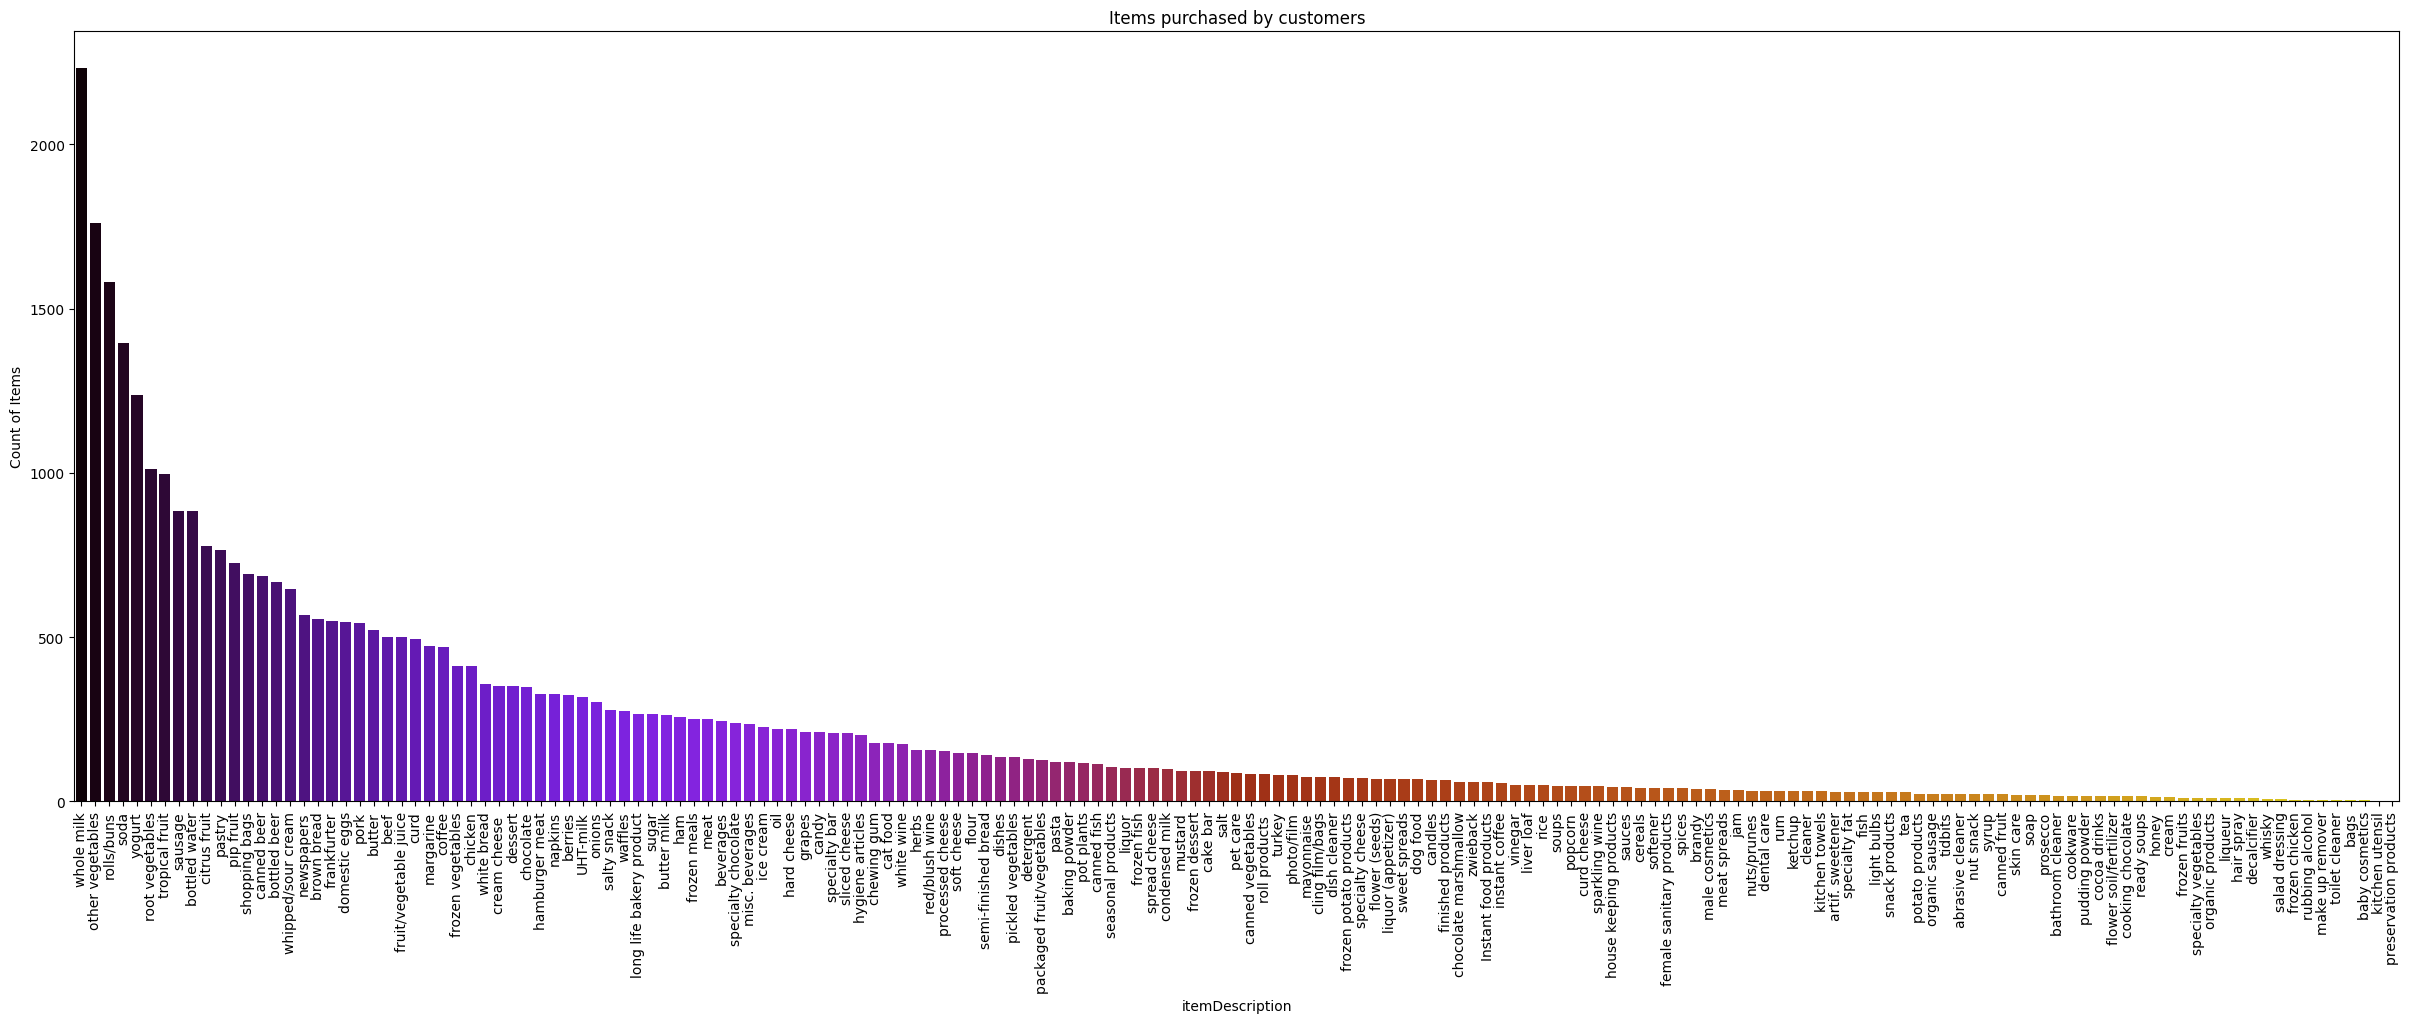

In [12]:
plt.figure(figsize=(30,10))
sns.barplot(x = data.itemDescription.value_counts().index, y = data.itemDescription.value_counts().values, palette = 'gnuplot')
plt.xlabel('itemDescription')
plt.xticks(rotation=90)
plt.ylabel('Count of Items')
plt.title('Items purchased by customers')
plt.show()

In [13]:
data['itemDescription'].value_counts()

whole milk               2232
other vegetables         1760
rolls/buns               1580
soda                     1394
yogurt                   1238
                         ... 
toilet cleaner              5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

Before we perform market basket analysis we need to turn the data into a tabular structure comprising ones and zeros

In [14]:
data['single_transaction'] = data['Member_number'].astype(str)+'_'+data['Date'].astype(str)

data.head()

,Member_number,Date,itemDescription,single_transaction
0,1808,21-07-2015,tropical fruit,1808_21-07-2015
1,2552,05-01-2015,whole milk,2552_05-01-2015
2,2300,19-09-2015,pip fruit,2300_19-09-2015
3,1187,12-12-2015,other vegetables,1187_12-12-2015
4,3037,01-02-2015,whole milk,3037_01-02-2015


In [15]:
data2 = pd.crosstab(data['single_transaction'], data['itemDescription'])
data2.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
single_transaction,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The resulting table tells us how many times each item has been purchased in one transaction

In [16]:
def encode(item_freq):
    res = 0
    if item_freq > 0:
        res = 1
    return res

basket_input = data2.applymap(encode)

###Applying Apriori

In [17]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

frequent_itemsets = apriori(basket_input, min_support=0.001, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift")

rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(UHT-milk),0.059836,0.021481,0.001084,0.018120,0.843525,-0.000201,0.996577
1,(UHT-milk),(bottled water),0.021481,0.059836,0.001084,0.050473,0.843525,-0.000201,0.990139
2,(UHT-milk),(sausage),0.021481,0.059836,0.001152,0.053628,0.896246,-0.000133,0.993440
3,(sausage),(UHT-milk),0.059836,0.021481,0.001152,0.019253,0.896246,-0.000133,0.997727
4,(UHT-milk),(tropical fruit),0.021481,0.067561,0.001491,0.069401,1.027227,0.000040,1.001977


To get the most frequent item combinations in the entire dataset, let’s sort the dataset by support, confidence, and lift

In [18]:
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(8)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
569,(rolls/buns),(whole milk),0.107068,0.151250,0.013079,0.122152,0.807615,-0.003115,0.966853
568,(whole milk),(rolls/buns),0.151250,0.107068,0.013079,0.086470,0.807615,-0.003115,0.977452
634,(yogurt),(whole milk),0.083892,0.151250,0.010368,0.123586,0.817099,-0.002321,0.968435
635,(whole milk),(yogurt),0.151250,0.083892,0.010368,0.068548,0.817099,-0.002321,0.983527
592,(sausage),(whole milk),0.059836,0.151250,0.008403,0.140430,0.928464,-0.000647,0.987412
593,(whole milk),(sausage),0.151250,0.059836,0.008403,0.055556,0.928464,-0.000647,0.995468
570,(yogurt),(rolls/buns),0.083892,0.107068,0.007319,0.087237,0.814787,-0.001664,0.978274
571,(rolls/buns),(yogurt),0.107068,0.083892,0.007319,0.068354,0.814787,-0.001664,0.983322
